In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [25]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3,3))(X_input)
    X = Conv2D(32, (7,7), strides=(1,1), name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc3')(X)
    
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

In [26]:
### START CODE HERE ### (1 line)
happyModel = HappyModel((64, 64, 3))
### END CODE HERE ###

In [27]:
happyModel.compile(optimizer = "Adam", loss = "mean_squared_error", metrics = ["accuracy"])

In [28]:
happyModel.fit(x = X_train, y = Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
600/600 [==============================] - 12s - loss: 0.4802 - acc: 0.5100    
Epoch 2/10
600/600 [==============================] - 12s - loss: 0.5000 - acc: 0.5000    
Epoch 3/10
600/600 [==============================] - 12s - loss: 0.5000 - acc: 0.5000    
Epoch 4/10
600/600 [==============================] - 12s - loss: 0.5000 - acc: 0.5000    
Epoch 5/10
600/600 [==============================] - 12s - loss: 0.5000 - acc: 0.5000    
Epoch 6/10
600/600 [==============================] - 12s - loss: 0.5000 - acc: 0.5000    
Epoch 7/10
600/600 [==============================] - 12s - loss: 0.5000 - acc: 0.5000    
Epoch 8/10
600/600 [==============================] - 12s - loss: 0.5000 - acc: 0.5000    
Epoch 9/10
600/600 [==============================] - 12s - loss: 0.5000 - acc: 0.5000    
Epoch 10/10
600/600 [==============================] - 12s - loss: 0.5000 - acc: 0.5000    


In [29]:
preds = happyModel.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s     

Loss = 0.559999998411
Test Accuracy = 0.440000001589


In [ ]:
happyModel.summary()

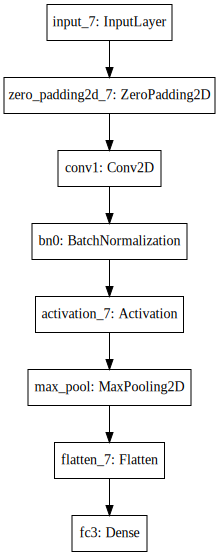

In [30]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

**References:**
- https://www.coursera.org/specializations/deep-learning